In [2]:
using Fussy

In [3]:
using Unitful

In [4]:
using Plots
using LaTeXStrings
using StringCases
pgfplots()

Plots.PGFPlotsBackend()

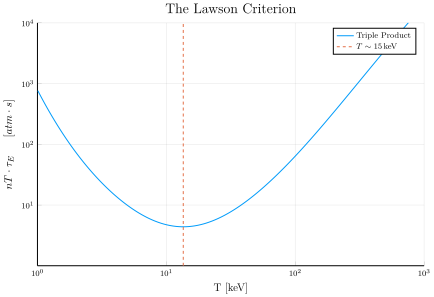

In [5]:
cur_T_list = collect(logspace(0,4,1401))[2:end]

cur_triple_product = cur_T_list[:]

cur_triple_product .^= 2

cur_triple_product ./= Fussy._bosch_hale.(cur_T_list)

cur_triple_product *= 60

cur_triple_product /= Fussy.E_F

cur_triple_product *= ustrip(uconvert(u"atm*s", 1u"keV"/1u"m^3/s"))

cur_triple_product /= 1e3

cur_plot = plot()

plot!(cur_T_list, cur_triple_product, yscale=:log10, xscale=:log10, label="Triple Product")

cur_min_T = cur_T_list[indmin(cur_triple_product)]

plot!([cur_min_T, cur_min_T], [1e0, 1e4], style=:dash, label=L"T \sim 15 \, \textnormal{keV}")
xlabel!("T \ \ [keV]")
ylabel!(L"n T \cdot \tau_E \ \ \ \ \ [atm \cdot s]")

ylims!(1.001e0,1e4)
xlims!(1e0,1e3)

title!("The Lawson Criterion")


In [29]:
savefig(cur_plot, "../images/lawson_criterion.tex")

In [6]:
cur_decks = ["scylla","charybdis","arc","act_1","act_2","demo_steady","demo_pulsed"]
cur_funcs = Dict()

for cur_deck in cur_decks
    cur_reactor = getfield(Fussy, Symbol("$(cur_deck)_deck"))()
    
    cur_funcs[cur_deck] = function(cur_T)
        tmp_reactor = deepcopy(cur_reactor)
        tmp_reactor.T_bar = cur_T
        
        tmp_reactor.sigma_v = Fussy.calc_sigma_v(tmp_reactor)
        
        cur_value = Fussy.G_PB(tmp_reactor) 
        cur_value /= Fussy.K_PB(tmp_reactor) 
        cur_value
    end
end

cur_T_list = collect(logspace(0,4,401))[2:end]

cur_triple_products = Dict()

for cur_deck in cur_decks
    cur_triple_products[cur_deck] = cur_funcs[cur_deck].(cur_T_list)
end

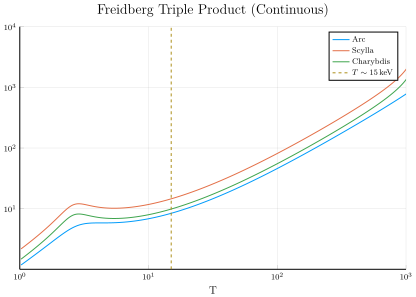

In [7]:
unbroken_plot = plot(xscale=:log10, yscale=:log10)

cur_deck = "arc"
cur_label = join(map(capitalize, split(cur_deck, "_")), " ")
plot!(cur_T_list, cur_triple_products[cur_deck], label=cur_label)

cur_deck = "scylla"
cur_label = join(map(capitalize, split(cur_deck, "_")), " ")
plot!(cur_T_list, cur_triple_products[cur_deck], label=cur_label)

cur_deck = "charybdis"
cur_label = join(map(capitalize, split(cur_deck, "_")), " ")
plot!(cur_T_list, cur_triple_products[cur_deck], label=cur_label)

ylims!(1.001e0,1e4)
xlims!(1e0,1e3)
plot!([15, 15], [1e0, 1e4], style=:dash, label=L"T \sim 15 \, \textnormal{keV}", color=5)

xlabel!("T")
title!("Freidberg Triple Product (Continuous)")
# ylabel!(L"f \, ( \ I_P \, , \, R_0 \, , \, B_0 \ )")

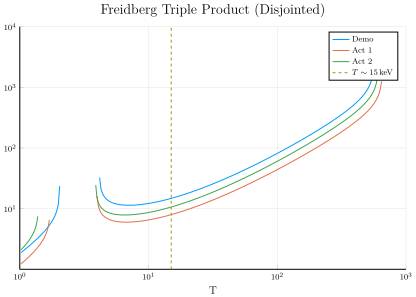

In [9]:
broken_plot = plot(xscale=:log10, yscale=:log10)


cur_deck = "demo_pulsed"
cur_label = "Demo"
plot!(cur_T_list, cur_triple_products[cur_deck], label=cur_label)

cur_deck = "act_1"
cur_label = join(map(capitalize, split(cur_deck, "_")), " ")
plot!(cur_T_list, cur_triple_products[cur_deck], label=cur_label)

cur_deck = "act_2"
cur_label = join(map(capitalize, split(cur_deck, "_")), " ")
plot!(cur_T_list, cur_triple_products[cur_deck], label=cur_label)

# cur_deck = "demo_steady"
# cur_label = join(map(capitalize, split(cur_deck, "_")), " ")
# plot!(cur_T_list, cur_triple_products[cur_deck], label=cur_label)

ylims!(1.001e0,1e4)
xlims!(1e0,1e3)
plot!([15, 15], [1e0, 1e4], style=:dash, label=L"T \sim 15 \, \textnormal{keV}", color=5)

xlabel!("T")
title!("Freidberg Triple Product (Disjointed)")
# ylabel!(L"f \, ( \ I_P \, , \, R_0 \, , \, B_0 \ )")

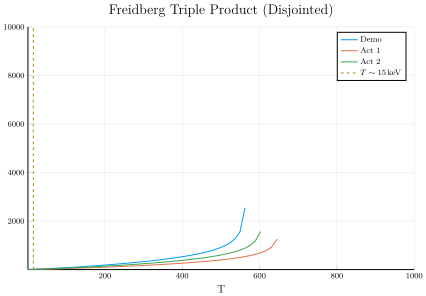

In [10]:
broken_plot = plot()


cur_deck = "demo_pulsed"
cur_label = "Demo"
plot!(cur_T_list, cur_triple_products[cur_deck], label=cur_label)

cur_deck = "act_1"
cur_label = join(map(capitalize, split(cur_deck, "_")), " ")
plot!(cur_T_list, cur_triple_products[cur_deck], label=cur_label)

cur_deck = "act_2"
cur_label = join(map(capitalize, split(cur_deck, "_")), " ")
plot!(cur_T_list, cur_triple_products[cur_deck], label=cur_label)

# cur_deck = "demo_steady"
# cur_label = join(map(capitalize, split(cur_deck, "_")), " ")
# plot!(cur_T_list, cur_triple_products[cur_deck], label=cur_label)

ylims!(1.001e0,1e4)
xlims!(1e0,1e3)
plot!([15, 15], [1e0, 1e4], style=:dash, label=L"T \sim 15 \, \textnormal{keV}", color=5)

xlabel!("T")
title!("Freidberg Triple Product (Disjointed)")
# ylabel!(L"f \, ( \ I_P \, , \, R_0 \, , \, B_0 \ )")

In [28]:
savefig(broken_plot, "../images/freidberg_criterion_broken.tex")
savefig(unbroken_plot, "../images/freidberg_criterion_unbroken.tex")

In [ ]:
cur_T_list = collect(logspace(0,2,151))[2:end]

cur_bosch_hale = Fussy._bosch_hale.(cur_T_list)
cur_reactivity = reactivity.(cur_T_list)

cur_sigv_log = sigv_log.(cur_T_list)
cur_sigv_lin = sigv_lin.(cur_T_list)

plot(xscale=:log10, yscale=:log10)
plot!(cur_T_list, cur_bosch_hale)
plot!(cur_T_list, cur_reactivity/1e6)
# plot!(cur_T_list, cur_sigv_log)
# plot!(cur_T_list, cur_sigv_log)

In [ ]:
cur_bosch_hale ./ cur_reactivity

In [ ]:
plot()
plot!(cur_T_list, cur_bosch_hale ./ rea.(cur_T_list), yscale=:log10)
# plot!(cur_T_list, cur_bosch_hale ./ cur_sigv_log)

In [ ]:
function sigv_log(t)
    tt = log(t)
    
    k0 = -60.4593
    k1 = 6.1371
    k2 = -0.8609
    k3 = 0.0356
    k4 = -0.0045
    
    exp(k0 + k1*tt + k2*tt^2 + k3 * tt^3 + k4 * tt^4) 
end

function sigv_lin(t)
    tt = (t)
    
    k0 = 3.2382e-24
    k1 = -5.8704e-24
    k2 = 1.3356e-24
    k3 = 7.4323e-26
    k4 = -5.1758e-27
    k5 = 7.5458e-29
    
    k0 + k1*tt + k2*tt^2 + k3 * tt^3 + k4 * tt^4 + k5 * tt^5
end



In [ ]:
function rea(t)
    c[1] * reactivity_theta(t) * sqrt( reactivity_xi(t) / ( mrc2 * t^3 ) ) * exp(-3*reactivity_xi(t))
end

In [ ]:
function reactivity_theta(t)
    cur_numerator = 0.0
    cur_numerator = c[6] + t * cur_numerator
    cur_numerator = c[4] + t * cur_numerator
    cur_numerator = c[2] + t * cur_numerator
    cur_numerator *= t
    
    cur_denominator = 0.0
    cur_denominator = c[7] + t * cur_denominator
    cur_denominator = c[5] + t * cur_denominator
    cur_denominator = c[3] + t * cur_denominator
    cur_denominator *= t
    
    cur_denominator += 1
    
    cur_theta = t
    cur_theta /= ( 1 - ( cur_numerator / cur_denominator ) )
end

In [ ]:
using SymEngine

In [ ]:
c = [symbols("c1 c2 c3 c4 c5 c6 c7")...]

In [ ]:
T = symbols("T")

In [ ]:
reactivity_theta(T)

In [ ]:
function reactivity_xi(t)
    cur_xi = bg ^ 2
    cur_xi /= ( 4 * reactivity_theta(t) )
    cur_xi ^= (1/3)
    
    cur_xi
end

In [ ]:
bg = 34.3827

In [ ]:
mrc2 = 1124656 

In [ ]:
reactivity(2)

In [ ]:
c = [
    1.17302e-9
    1.51361e-2
    7.51886e-2
    4.60643e-3
    1.35000e-2
    -1.06750e-4
    1.36600e-5
]

In [ ]:
rea(20)

In [ ]:
Fussy._bosch_hale(20.0)